In [1]:
import numpy
import random
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from PIL import Image
import pandas
from sklearn.linear_model import LinearRegression, LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn
import scipy
from scipy import stats
from scipy.stats import poisson, ttest_ind
from scipy import linalg
import xarray as xr
import netCDF4
import cftime
import readline
import os

In [2]:
# Open File
File = '/glade/u/home/whimkao/ExtraTrack/ExTraTrack/et-tracker/text_files/traj_et_erai_avg'
Data = open(File, 'r')
Rows = []
#
# Organize Data
for Line in Data:
    Rows.append(Line.strip())
#print (Rows)
#
# Organize Data Into Dictionary Containing Arrays
Storm_Code = []
Storm_List = []
for i in range(len(Rows)):
    if Rows[i][0:5] == 'start':
        Code = Rows[i][41:45]
        Storm_List.append(Code)
    else:
        Storm_Code.append(Code)
Array = numpy.zeros((13, len(Rows)-len(Storm_List)))
Time = []
k = -1
for i in range(len(Rows)):
    if Rows[i][0:5] == 'start':
        k += 1
    else:
        Array[0][i-k-1] = float(Rows[i][0:6])
        Array[1][i-k-1] = float(Rows[i][9:14])
        Array[2][i-k-1] = float(Rows[i][17:24])
        Array[3][i-k-1] = float(Rows[i][27:31])
        Array[4][i-k-1] = float(Rows[i][34:41])
        Array[5][i-k-1] = float(Rows[i][44:51])
        Array[6][i-k-1] = float(Rows[i][54:61])
        Array[7][i-k-1] = float(Rows[i][64:71])
        Array[8][i-k-1] = float(Rows[i][74:81])
        Time.append(datetime.datetime(year=int(Rows[i][84:88]), month=int(Rows[i][90:92]), \
        day=int(Rows[i][94:96]), hour=int(Rows[i][98:100])))
#        Array[9][i-k-1] = int(Rows[i][84:88])
#        Array[10][i-k-1] = int(Rows[i][90:92])
#        Array[11][i-k-1] = int(Rows[i][94:96])
#        Array[12][i-k-1] = int(Rows[i][98:100])
#        print (Rows[i])
#        print (float(Rows[i][9:14]))
#        print (Rows[i][17])
#print (Array)
#
# Create DataFrame to Store Data
DF = pandas.DataFrame({"Code": Storm_Code, "Lon": Array[0], "Lat": Array[1], "SLP(hPa)": Array[2], \
"Winds(m/s)": Array[3], "Dist(m)": Array[4], "Angle": Array[5], "B": Array[6], "VLT": Array[7], "VUT": Array[8], \
"Time(Z)": Time})
#"Year": Array[9], "Month": Array[10], "Day": Array[11], "Hour(Z)": Array[12]})
DF

,Code,Lon,Lat,SLP(hPa),Winds(m/s),Dist(m),Angle,B,VLT,VUT,Time(Z)
0,0001,296.72,31.23,1015.21,14.1,-999.00,-999.00,-999.00,-999.00,-999.00,2001-09-09 12:00:00
1,0001,297.42,31.93,1015.14,13.1,102.60,40.30,-2.14,11.64,37.10,2001-09-09 18:00:00
2,0001,296.72,32.63,1015.19,12.7,102.27,319.92,-2.41,14.27,32.46,2001-09-10 00:00:00
3,0001,296.02,34.04,1013.36,12.0,169.19,337.56,0.34,12.01,36.64,2001-09-10 06:00:00
4,0001,295.31,34.74,1013.55,12.3,101.25,320.61,-0.13,10.88,36.36,2001-09-10 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...
150,0007,314.30,42.46,1005.00,17.6,288.41,90.00,30.77,-189.52,-123.71,2001-09-27 18:00:00
151,0007,317.81,41.75,1004.91,18.0,300.33,104.94,32.84,-194.11,-147.29,2001-09-28 00:00:00
152,0007,321.33,41.05,1002.57,17.9,303.41,104.79,34.44,-192.32,-157.85,2001-09-28 06:00:00
153,0007,324.84,41.05,1004.09,18.1,294.79,90.00,34.00,-187.59,-166.78,2001-09-28 12:00:00


In [3]:
print (Storm_List)

['0001', '0002', '0004', '0007']


In [4]:
DF_Storm = DF[DF['Code']=='0004']
DF_Storm

,Code,Lon,Lat,SLP(hPa),Winds(m/s),Dist(m),Angle,B,VLT,VUT,Time(Z)
84,0004,274.22,24.91,1005.94,12.5,-999.00,-999.00,-999.00,-999.00,-999.00,2001-09-13 06:00:00
85,0004,274.22,24.91,1005.01,11.7,0.00,0.00,-3.88,46.76,-54.63,2001-09-13 12:00:00
86,0004,274.92,24.91,1004.20,13.1,70.91,90.00,0.94,36.46,-51.06,2001-09-13 18:00:00
87,0004,274.92,24.91,1003.01,12.9,0.00,0.00,1.92,30.80,-42.14,2001-09-14 00:00:00
88,0004,275.63,25.61,1002.91,15.9,105.30,42.03,8.86,33.98,-38.42,2001-09-14 06:00:00
89,0004,277.03,27.02,1001.27,17.0,209.77,41.62,8.92,34.36,-27.16,2001-09-14 12:00:00
90,0004,278.44,28.42,999.64,18.1,208.61,41.25,14.59,31.65,-15.29,2001-09-14 18:00:00
91,0004,278.44,29.12,999.39,19.6,78.03,0.00,14.21,34.58,-5.07,2001-09-15 00:00:00
92,0004,279.14,29.12,1000.58,20.0,68.30,90.00,16.47,24.07,0.39,2001-09-15 06:00:00
93,0004,279.14,29.12,1000.77,20.6,0.00,0.00,18.04,11.47,0.50,2001-09-15 12:00:00


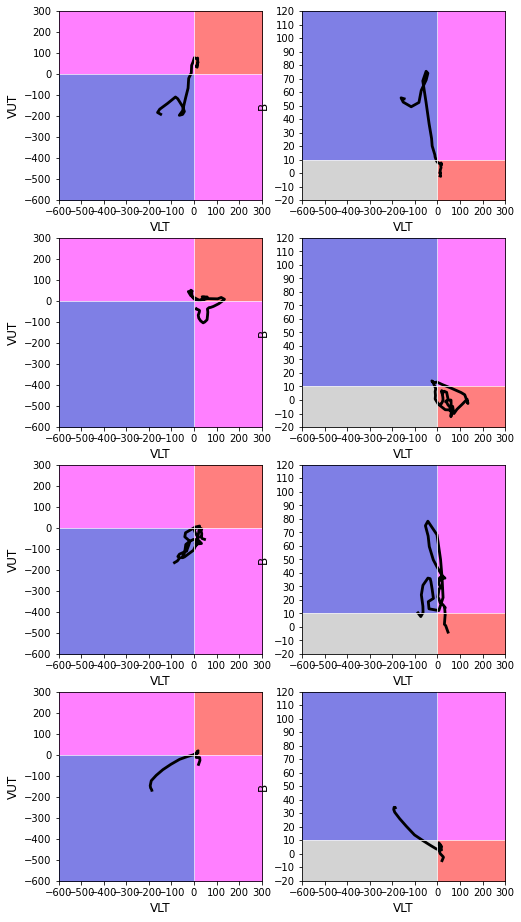

In [5]:
# Create Cyclone Phase Diagram
Fig = pyplot.figure(figsize=(8, 4*len(Storm_List)))
Count = 0
for i in range(len(Storm_List)):
# Plot For Each Storm
    DF_Storm = DF[DF['Code'] == Storm_List[i]]
    Count += 1
# VUT VLT
    Axis = Fig.add_subplot(len(Storm_List), 2, Count)
    Axis.plot(DF_Storm["VLT"][1:], DF_Storm["VUT"][1:], c='black', linewidth=2.8)
    x_Axis = numpy.arange(-600,400,100)
    y_Axis = numpy.arange(-600,400,100)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(-600,300)
    pyplot.ylim(-600,300)
    pyplot.fill_between([0,300], 300, color='red', alpha=0.5)
    pyplot.fill_between([-600,0], 300, color='magenta', alpha=0.5)
    pyplot.fill_between([0,300], -600, color='magenta', alpha=0.5)
    pyplot.fill_between([-600,0], -600, color='mediumblue', alpha=0.5)
    pyplot.plot([-600,300], [0,0], 'white', linewidth=0.8)
    pyplot.plot([0,0], [-600,300], 'white', linewidth=0.8)
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('VUT', fontsize=12)
#    pyplot.title(Storm_List[i], fontsize=16)
#
# Create Cyclone Phase Diagram VLT B
    Count += 1
    DF_Storm = DF[DF['Code'] == Storm_List[i]]
    Axis = Fig.add_subplot(len(Storm_List), 2, Count)
    Axis.plot(DF_Storm["VLT"][1:], DF_Storm["B"][1:], c='black', linewidth=2.8)
    #
    # Formatting
    x_Axis = numpy.arange(-600,400,100)
    y_Axis = numpy.arange(-20,130,10)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(-600,300)
    pyplot.ylim(-20,120)
    pyplot.fill_between([0,300], 10, 120, color='magenta', alpha=0.5)
    pyplot.fill_between([-600,0], 10, 120, color='mediumblue', alpha=0.5)
    pyplot.fill_between([0,300], -20, 10, color='red', alpha=0.5)
    pyplot.fill_between([-600,0], -20, 10, color='darkgrey', alpha=0.5)
    pyplot.plot([-600,300], [10,10], 'white', linewidth=0.8)
    pyplot.plot([0,0], [-20,120], 'white', linewidth=0.8)
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('B', fontsize=12)
pyplot.show()

In [6]:
Storm_List

['0001', '0002', '0004', '0007']

In [7]:
# Open ET Transition File
File = '/glade/u/home/whimkao/ExtraTrack/ExTraTrack/et-tracker/climatology_files/etdetails_erai.txt'
Data = open(File, 'r')
Rows = []
#
# Organize Data
for Line in Data:
    Rows.append(Line.strip())
for i in range(len(Rows)):
    print (Rows[i])
    print (Rows[i][53:57])
#

0001   003  2  1002.64  999.68   2001  09  13  12    2001  09  14  06
2001
0004   014  1  1000.58  993.48   2001  09  15  06    2001  09  18  18
2001
0007   004  2  1012.21 1007.05   2001  09  26  06    2001  09  27  06
2001


In [8]:
# Open ET Transition File
File = '/glade/u/home/whimkao/ExtraTrack/ExTraTrack/et-tracker/climatology_files/etdetails_erai.txt'
Data = open(File, 'r')
Rows = []
#
# Organize Data
for Line in Data:
    Rows.append(Line.strip())
#print (Rows)
#
# Organize ET Start and End Data
ET_Start = []
ET_End = []
k = 0
for i in range(len(Storm_List)):
    if Storm_List[i] == Rows[i-k][0:4]:
        ET_Start.append(datetime.datetime(year=int(Rows[i-k][33:37]), month=int(Rows[i-k][39:41]), \
        day=int(Rows[i-k][43:45]), hour=int(Rows[i-k][47:49])))
        ET_End.append(datetime.datetime(year=int(Rows[i-k][53:57]), month=int(Rows[i-k][59:61]), \
        day=int(Rows[i-k][63:65]), hour=int(Rows[i-k][67:69])))
    else:
        ET_Start.append(0)
        ET_End.append(0)
        k += 1
print (ET_Start)
print (ET_End)

[datetime.datetime(2001, 9, 13, 12, 0), 0, datetime.datetime(2001, 9, 15, 6, 0), datetime.datetime(2001, 9, 26, 6, 0)]
[datetime.datetime(2001, 9, 14, 6, 0), 0, datetime.datetime(2001, 9, 18, 18, 0), datetime.datetime(2001, 9, 27, 6, 0)]


In [9]:
if ET_Start[0] < ET_End[0]:
    print ("True")

True


In [10]:
# Define Cyclone Type
Cyclone_Type = []
Plot_Shape = []
for i in range(len(Storm_List)):
    DF_Storm = DF[DF['Code'] == Storm_List[i]]
    if ET_Start[i] != 0 and ET_End[i] != 0:
        for j in range(len(DF_Storm['Time(Z)'])):
            if list(DF_Storm['Time(Z)'])[j] < ET_Start[i]:
#                print ("Tropical")
                Cyclone_Type.append("Tropical")
                Plot_Shape.append("o")
            elif list(DF_Storm['Time(Z)'])[j] < ET_End[i]:
#                print ("Transitioning")
                Cyclone_Type.append("Transitioning")
                Plot_Shape.append("s")
            else:
#                print ("Extratropical")
                Cyclone_Type.append("Extratropical")
                Plot_Shape.append("^")
    elif ET_Start[i] != 0 and ET_End[i] == 0:
        for j in range(len(DF_Storm['Time(Z)'])):
            if list(DF_Storm['Time(Z)'])[j] < ET_Start[i]:
#                print ("Tropical")
                Cyclone_Type.append("Tropical")
                Plot_Shape.append("o")
            else:
#                print ("Transitioning")
                Cyclone_Type.append("Transitioning")
                Plot_Shape.append("s")
    elif ET_Start[i] == 0 and ET_End[i] == 0:
        for j in range(len(DF_Storm['Time(Z)'])):
#            print ("Tropical")
            Cyclone_Type.append("Tropical")
            Plot_Shape.append("o")
#    print ("")
print (Plot_Shape)
DF["Type"] = Cyclone_Type
DF["Shape"] = Plot_Shape
DF

['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 's', 's', 's', 's', '^', '^', '^', '^', '^', '^', '^']


,Code,Lon,Lat,SLP(hPa),Winds(m/s),Dist(m),Angle,B,VLT,VUT,Time(Z),Type,Shape
0,0001,296.72,31.23,1015.21,14.1,-999.00,-999.00,-999.00,-999.00,-999.00,2001-09-09 12:00:00,Tropical,o
1,0001,297.42,31.93,1015.14,13.1,102.60,40.30,-2.14,11.64,37.10,2001-09-09 18:00:00,Tropical,o
2,0001,296.72,32.63,1015.19,12.7,102.27,319.92,-2.41,14.27,32.46,2001-09-10 00:00:00,Tropical,o
3,0001,296.02,34.04,1013.36,12.0,169.19,337.56,0.34,12.01,36.64,2001-09-10 06:00:00,Tropical,o
4,0001,295.31,34.74,1013.55,12.3,101.25,320.61,-0.13,10.88,36.36,2001-09-10 12:00:00,Tropical,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0007,314.30,42.46,1005.00,17.6,288.41,90.00,30.77,-189.52,-123.71,2001-09-27 18:00:00,Extratropical,^
151,0007,317.81,41.75,1004.91,18.0,300.33,104.94,32.84,-194.11,-147.29,2001-09-28 00:00:00,Extratropical,^
152,0007,321.33,41.05,1002.57,17.9,303.41,104.79,34.44,-192.32,-157.85,2001-09-28 06:00:00,Extratropical,^
153,0007,324.84,41.05,1004.09,18.1,294.79,90.00,34.00,-187.59,-166.78,2001-09-28 12:00:00,Extratropical,^


In [17]:
# SLP Colour Code
Colours = ['black', 'mediumblue', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', 'red', 'darkviolet']
Colour_Labels = ['>=1010hPa', '1005-1010hPa', '1000-1005hPa', '990-1000hPa', '980-990hPa', \
'970-980hPa', '960-970hPa', '950-960hPa', '<950hPa']
Plot_Colour = []
for i in range(len(DF['SLP(hPa)'])):
        if DF['SLP(hPa)'][i] >= 1010:
            Plot_Colour.append(Colours[0])
        elif DF['SLP(hPa)'][i] >= 1005:
            Plot_Colour.append(Colours[1])
        elif DF['SLP(hPa)'][i] >= 1000:
            Plot_Colour.append(Colours[2])
        elif DF['SLP(hPa)'][i] >= 990:
            Plot_Colour.append(Colours[3])
        elif DF['SLP(hPa)'][i] >= 980:
            Plot_Colour.append(Colours[4])
        elif DF['SLP(hPa)'][i] >= 970:
            Plot_Colour.append(Colours[5])
        elif DF['SLP(hPa)'][i] >= 960:
            Plot_Colour.append(Colours[6])
        elif DF['SLP(hPa)'][i] >= 950:
            Plot_Colour.append(Colours[7])
        else:
            Plot_Colour.append(Colours[8])
print (Plot_Colour)
DF["Colour"] = Plot_Colour

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'mediumblue', 'mediumblue', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'limegreen', 'limegreen', 'gold', 'darkorange', 'gold', 'gold', 'limegreen', 'darkgreen', 'darkgreen', 'cyan', 'mediumblue', 'black', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'cyan', 'cyan', 'cyan', 'cyan', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'mediumblue', 'cyan', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'mediumblue', 'black', 'black', 'black', 'black', 'black', 'black', 'mediumblue', 'mediumblue', 'cyan', 'cyan', 'cyan', 'cyan',

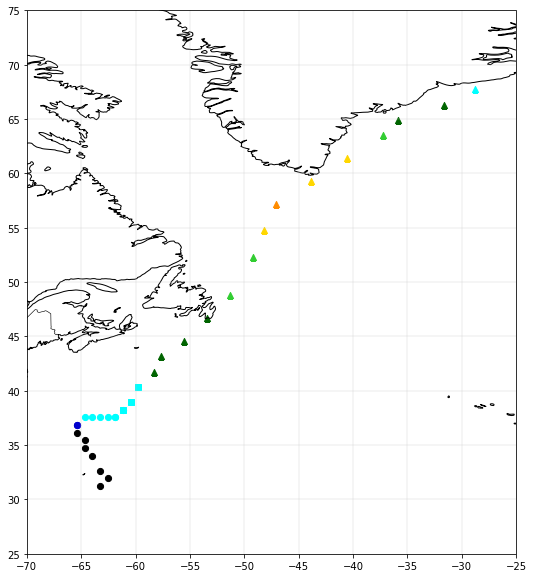

In [39]:
# Plot Cyclone Track
def Plot_Cyclone_Track(Storm_Code, DF):
    DF_Storm = DF[DF['Code'] == Storm_Code]
    Lon = numpy.array(DF_Storm['Lon'])
    Lat = numpy.array(DF_Storm['Lat'])
    Plot_Colour = list(DF_Storm['Colour'])
    Plot_Shape = list(DF_Storm['Shape'])
#
# Plotting
    Fig = pyplot.figure(figsize=(10,10))
    Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
    Axis.coastlines()
    Axis.add_feature(cfeature.BORDERS, linewidth=0.6)
#    Axis.add_feature(cfeature.STATES, linewidth=0.5)
    for k in range(len(Lon)):
        pyplot.scatter(Lon[k], Lat[k], c=Plot_Colour[k], marker=Plot_Shape[k], s=38)
#
# Formatting
    x_Min = (int(round(numpy.min(Lon) / 5)) - 1) * 5 - 360
    x_Max = (int(round(numpy.max(Lon) / 5)) + 1) * 5 - 360
    y_Min = (int(round(numpy.min(Lat) / 5)) - 1) * 5
    y_Max = (int(round(numpy.max(Lat) / 5)) + 1) * 5
    x_Axis = numpy.arange(x_Min,x_Max+5,5)
    y_Axis = numpy.arange(y_Min,y_Max+5,5)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(y_Min,y_Max)
    Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='silver', linestyle='-')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
Plot_Cyclone_Track("0001", DF)

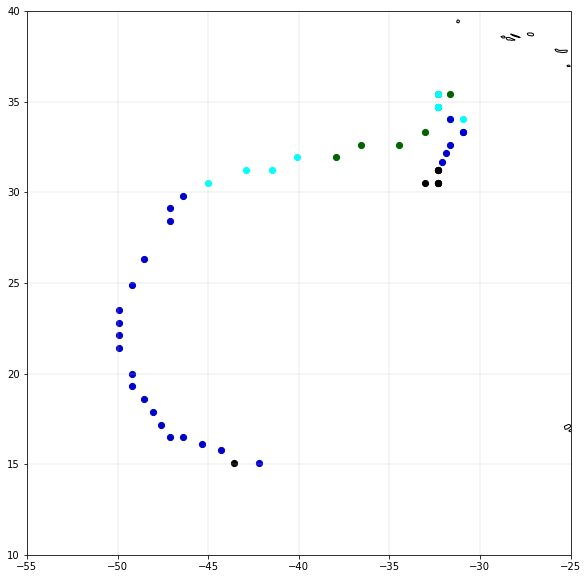

In [41]:
Plot_Cyclone_Track("0002", DF)

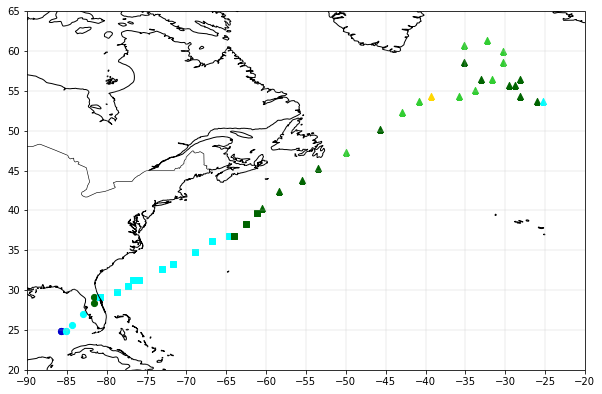

In [42]:
Plot_Cyclone_Track("0004", DF)

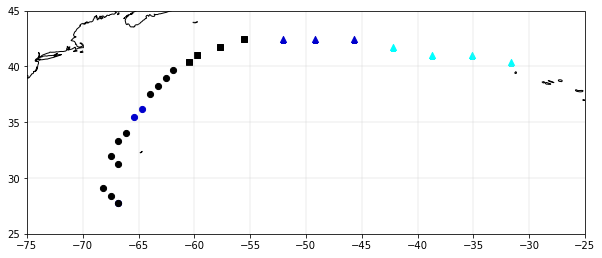

In [43]:
Plot_Cyclone_Track("0007", DF)

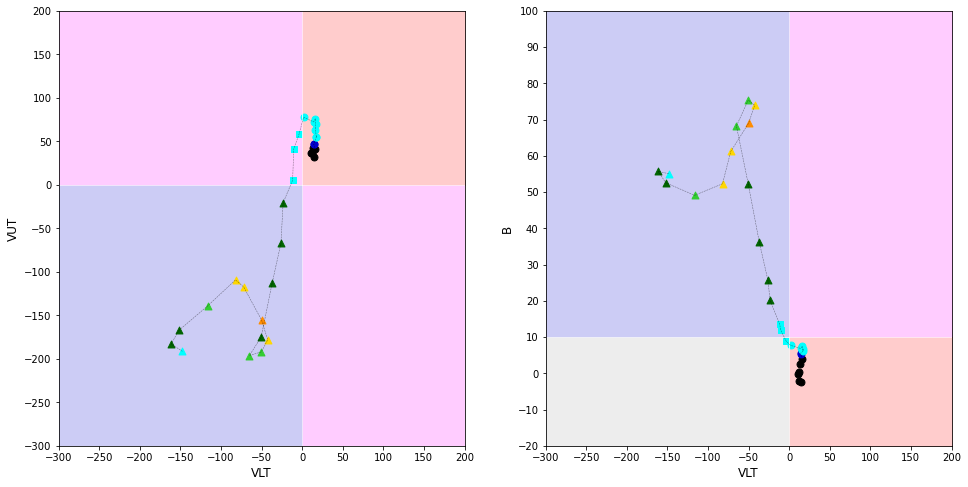

In [81]:
# Plot Cyclone Phase Diagram
def Plot_Cyclone_Phase(Storm_Code, DF):
    DF_Storm = DF[DF['Code'] == Storm_Code]
    VLT = numpy.array(DF_Storm['VLT'])[1:]
    VUT = numpy.array(DF_Storm['VUT'])[1:]
    B = numpy.array(DF_Storm['B'])[1:]
    Plot_Colour = list(DF_Storm['Colour'])[1:]
    Plot_Shape = list(DF_Storm['Shape'])[1:]
#
# Plotting VUT VLT
    Fig = pyplot.figure(figsize=(16,8))
    Axis = Fig.add_subplot(1,2,1)
    x_Axis = numpy.arange(-300,250,50)
    y_Axis = numpy.arange(-300,250,50)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(-300,200)
    pyplot.ylim(-300,200)
    pyplot.fill_between([0,300], 300, color='red', alpha=0.2)
    pyplot.fill_between([-600,0], 300, color='magenta', alpha=0.2)
    pyplot.fill_between([0,300], -600, color='magenta', alpha=0.2)
    pyplot.fill_between([-600,0], -600, color='mediumblue', alpha=0.2)
    pyplot.plot([-600,300], [0,0], 'white', linewidth=0.8)
    pyplot.plot([0,0], [-600,300], 'white', linewidth=0.8)
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('VUT', fontsize=12)
    Axis.plot(VLT, VUT, c='black', linestyle='--', linewidth=0.5, alpha=0.5)
    for k in range(len(VLT)):
        Axis.scatter(VLT[k], VUT[k], c=Plot_Colour[k], marker=Plot_Shape[k], s=48)
#
# Plotting VUT VLT
    Axis = Fig.add_subplot(1,2,2)
    x_Axis = numpy.arange(-300,250,50)
    y_Axis = numpy.arange(-20,110,10)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(-300,200)
    pyplot.ylim(-20,100)
    pyplot.fill_between([0,300], 10, 120, color='magenta', alpha=0.2)
    pyplot.fill_between([-600,0], 10, 120, color='mediumblue', alpha=0.2)
    pyplot.fill_between([0,300], -20, 10, color='red', alpha=0.2)
    pyplot.fill_between([-600,0], -20, 10, color='darkgrey', alpha=0.2)
    pyplot.plot([-600,300], [10,10], 'white', linewidth=0.8)
    pyplot.plot([0,0], [-20,120], 'white', linewidth=0.8)
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('B', fontsize=12)
    Axis.plot(VLT, B, c='black', linestyle='--', linewidth=0.5, alpha=0.5)
    for k in range(len(VLT)):
        Axis.scatter(VLT[k], B[k], c=Plot_Colour[k], marker=Plot_Shape[k], s=48)
#
Plot_Cyclone_Phase("0001", DF)

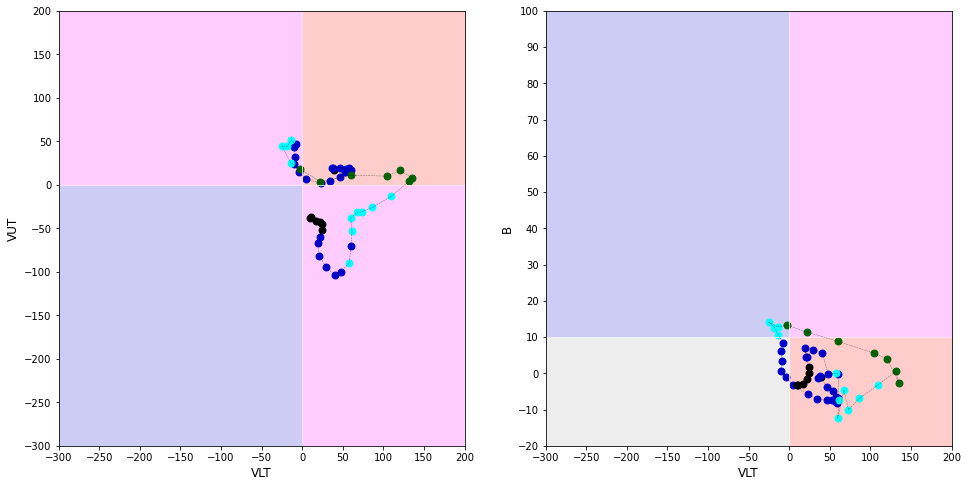

In [82]:
Plot_Cyclone_Phase("0002", DF)

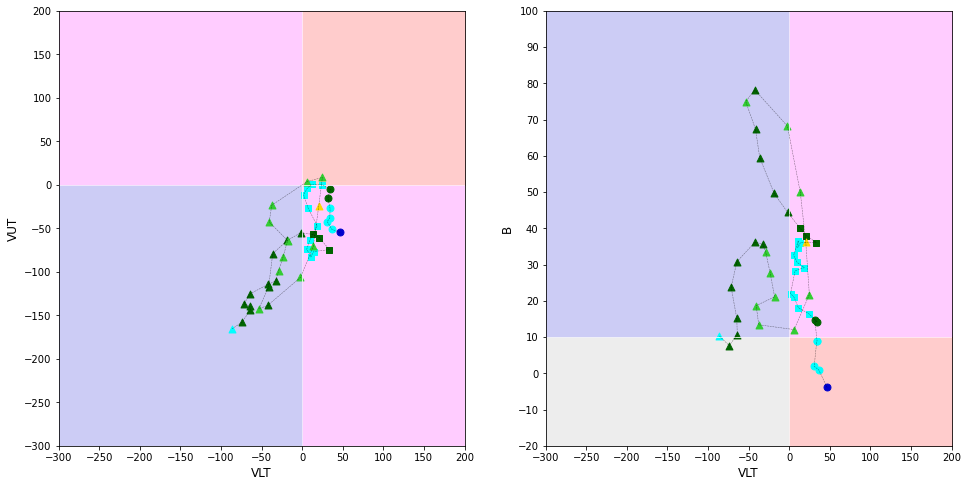

In [83]:
Plot_Cyclone_Phase("0004", DF)

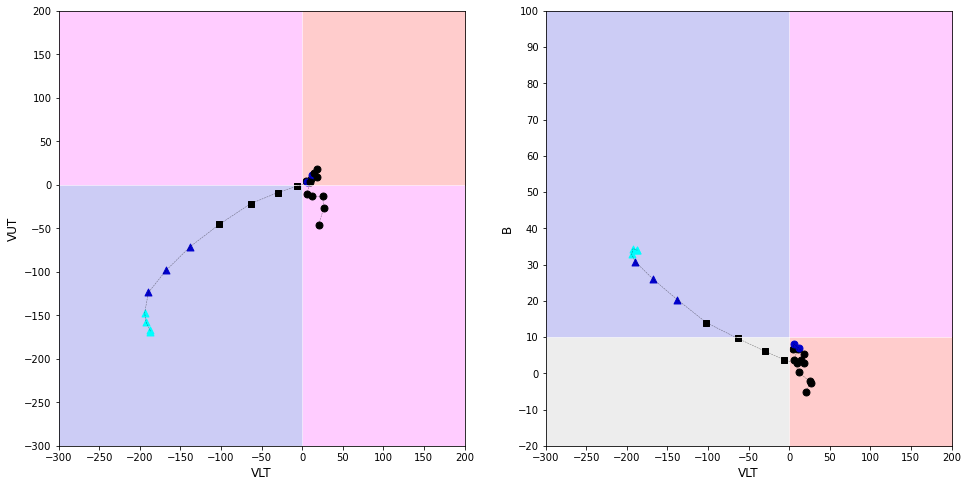

In [84]:
Plot_Cyclone_Phase("0007", DF)

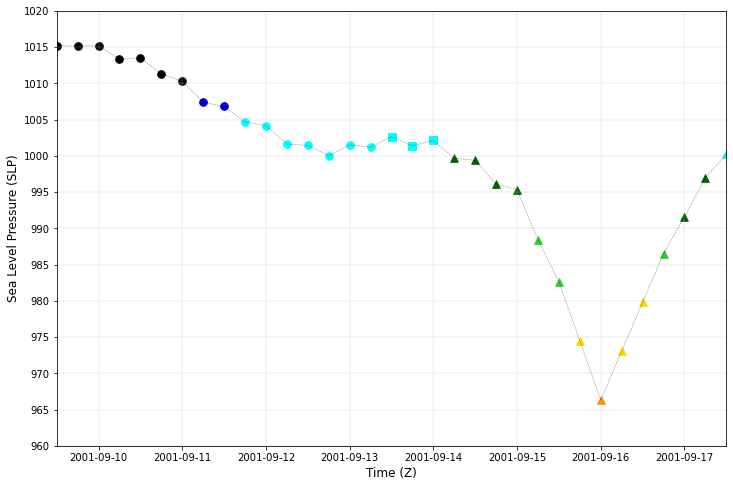

In [91]:
# Plot Cyclone SLP
def Plot_Cyclone_SLP(Storm_Code, DF):
    DF_Storm = DF[DF['Code'] == Storm_Code]
    Time = list(DF_Storm['Time(Z)'])
    SLP = numpy.array(DF_Storm['SLP(hPa)'])
    Plot_Colour = list(DF_Storm['Colour'])
    Plot_Shape = list(DF_Storm['Shape'])
#
# Plotting
    Fig = pyplot.figure(figsize=(12,8))
    Axis = Fig.add_subplot(1,1,1)
    Axis.plot(Time, SLP, c='black', linestyle='--', linewidth=0.5, alpha=0.5)
    for k in range(len(Time)):
        Axis.scatter(Time[k], SLP[k], c=Plot_Colour[k], marker=Plot_Shape[k], s=58)
#
# Formatting
    pyplot.xlabel('Time (Z)', fontsize=12)
    pyplot.ylabel('Sea Level Pressure (SLP)', fontsize=12)
    x_Min = Time[0]
    x_Max = Time[len(Time)-1]
    y_Min = (int(round(numpy.min(SLP) / 5)) - 1) * 5
    y_Max = (int(round(numpy.max(SLP) / 5)) + 1) * 5
#    x_Axis = numpy.arange(x_Min,x_Max+5,5)
    y_Axis = numpy.arange(y_Min,y_Max+5,5)
#    Axis.set_xticks()
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(y_Min,y_Max)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
#    Gridline.xlocator = mticker.FixedLocator(x_Axis)
#    Gridline.ylocator = mticker.FixedLocator(y_Axis)
Plot_Cyclone_SLP("0001", DF)

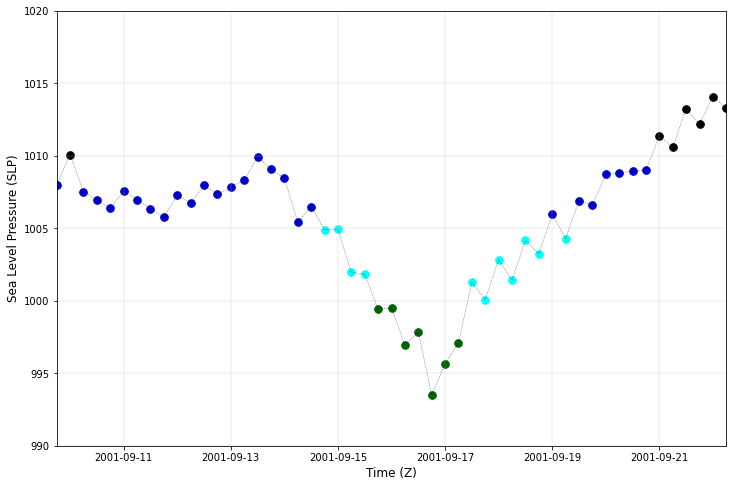

In [92]:
Plot_Cyclone_SLP("0002", DF)

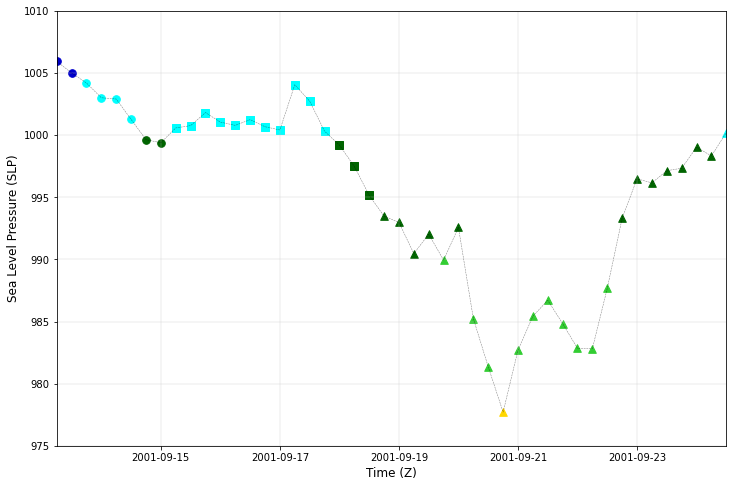

In [93]:
Plot_Cyclone_SLP("0004", DF)

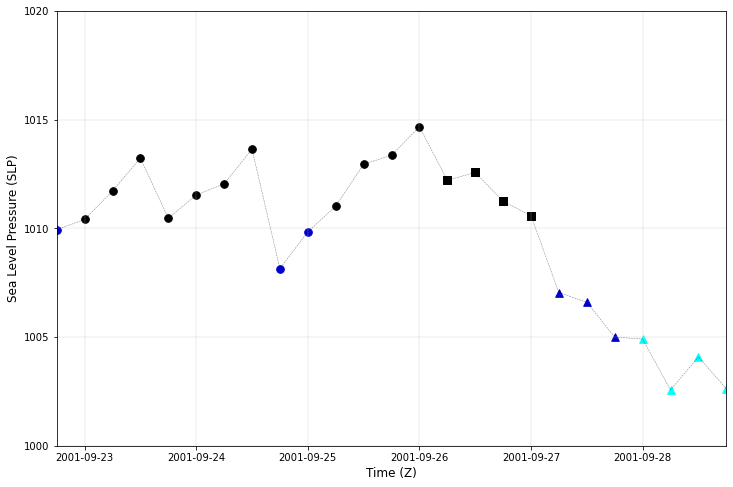

In [94]:
Plot_Cyclone_SLP("0007", DF)

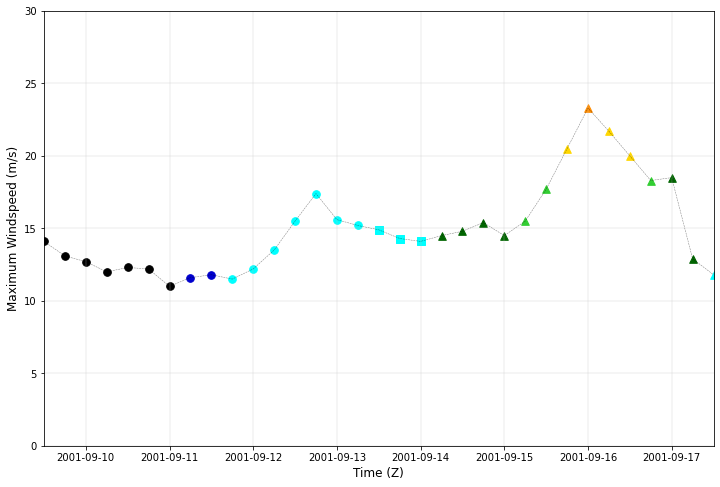

In [100]:
# Plot Cyclone Windspeed
def Plot_Cyclone_Winds(Storm_Code, DF):
    DF_Storm = DF[DF['Code'] == Storm_Code]
    Time = list(DF_Storm['Time(Z)'])
    Winds = numpy.array(DF_Storm['Winds(m/s)'])
    Plot_Colour = list(DF_Storm['Colour'])
    Plot_Shape = list(DF_Storm['Shape'])
#
# Plotting
    Fig = pyplot.figure(figsize=(12,8))
    Axis = Fig.add_subplot(1,1,1)
    Axis.plot(Time, Winds, c='black', linestyle='--', linewidth=0.5, alpha=0.5)
    for k in range(len(Time)):
        Axis.scatter(Time[k], Winds[k], c=Plot_Colour[k], marker=Plot_Shape[k], s=58)
#
# Formatting
    pyplot.xlabel('Time (Z)', fontsize=12)
    pyplot.ylabel('Maximum Windspeed (m/s)', fontsize=12)
    x_Min = Time[0]
    x_Max = Time[len(Time)-1]
    y_Min = 0
    y_Max = (int(round(numpy.max(Winds) / 5)) + 1) * 5
#    x_Axis = numpy.arange(x_Min,x_Max+5,5)
    y_Axis = numpy.arange(y_Min,y_Max+5,5)
#    Axis.set_xticks()
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(0,y_Max)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
#    Gridline.xlocator = mticker.FixedLocator(x_Axis)
#    Gridline.ylocator = mticker.FixedLocator(y_Axis)
Plot_Cyclone_Winds("0001", DF)

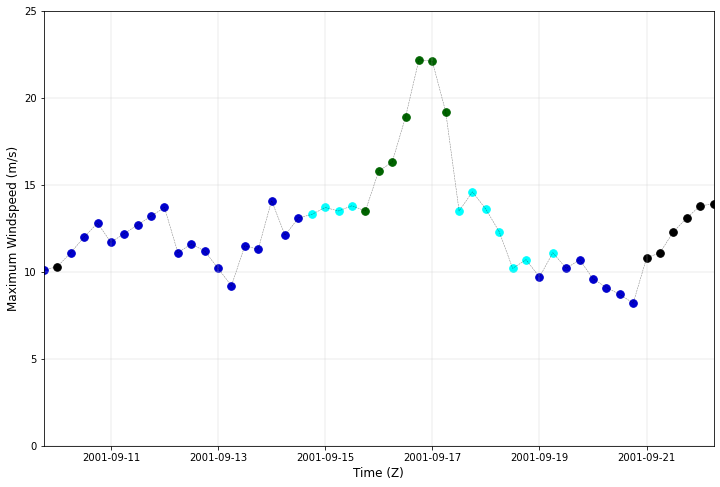

In [101]:
Plot_Cyclone_Winds("0002", DF)

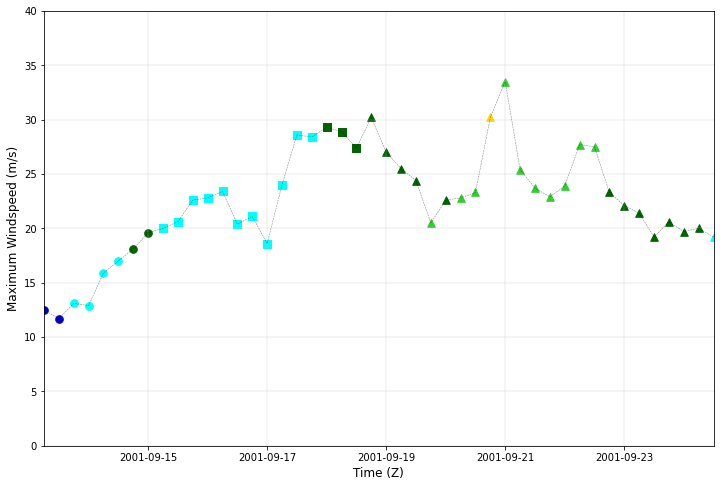

In [102]:
Plot_Cyclone_Winds("0004", DF)

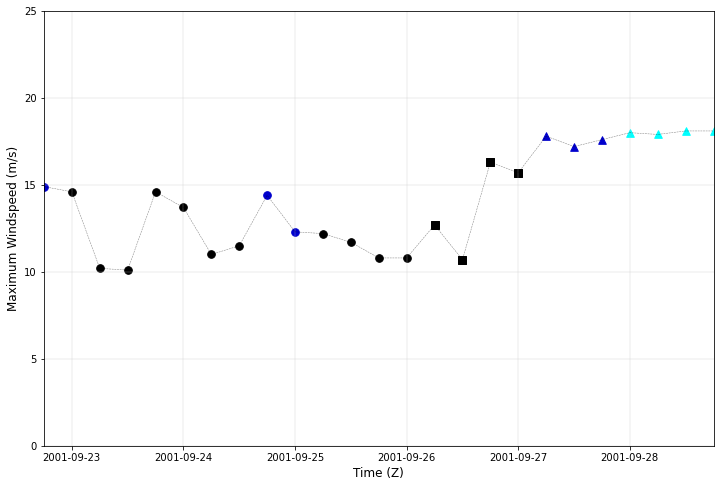

In [103]:
Plot_Cyclone_Winds("0007", DF)